"""
# Introduction

This simulation explores the dynamics of the **Standard Map** (also known as the **Chirikov Map**), a classic model in the study of Hamiltonian chaos. In this system, the variables are defined on a torus:
- **X (Angle):** Represents the phase or angle of a kicked rotor.
- **Y (Momentum):** Represents the momentum (or action) of the system.

As the parameter \( k \) increases, the system undergoes a transition from regular (integrable) behavior—where trajectories lie on smooth invariant curves—to chaotic dynamics, where the trajectories spread out irregularly in phase space. In this code, the list of \( k \) values is sorted in increasing order, ensuring that the phase space portraits evolve with increasing nonlinearity.

The following class-based implementation allows for extended exploration, plotting, and even saving of the phase-space figures.
"""

Simulating for k = 0 ...


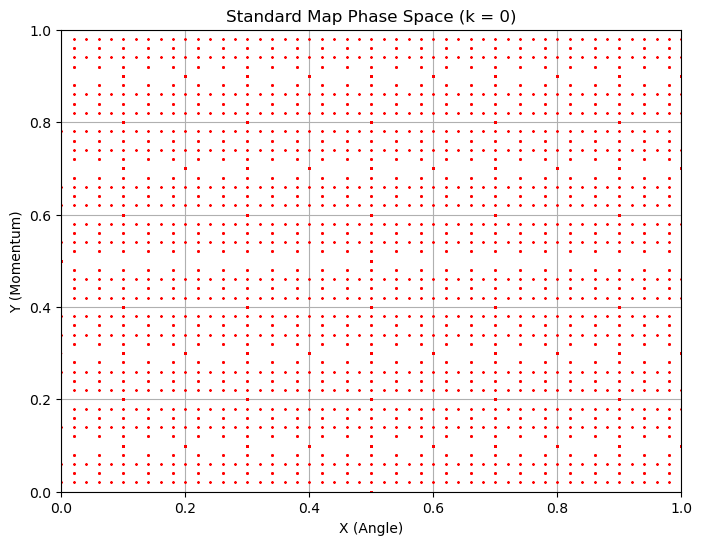

Simulating for k = 0.2 ...


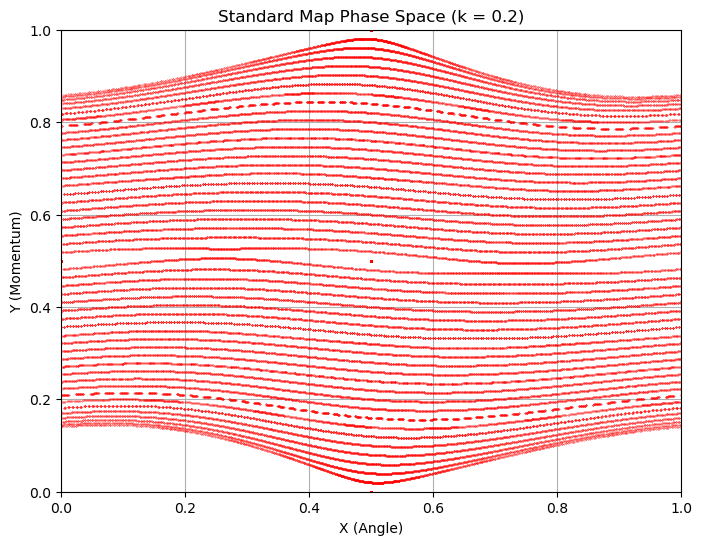

Simulating for k = 0.5 ...


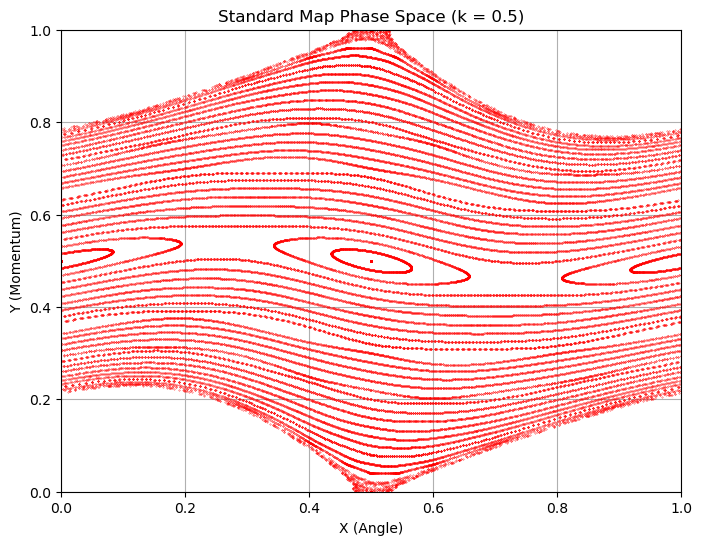

Simulating for k = 0.7 ...


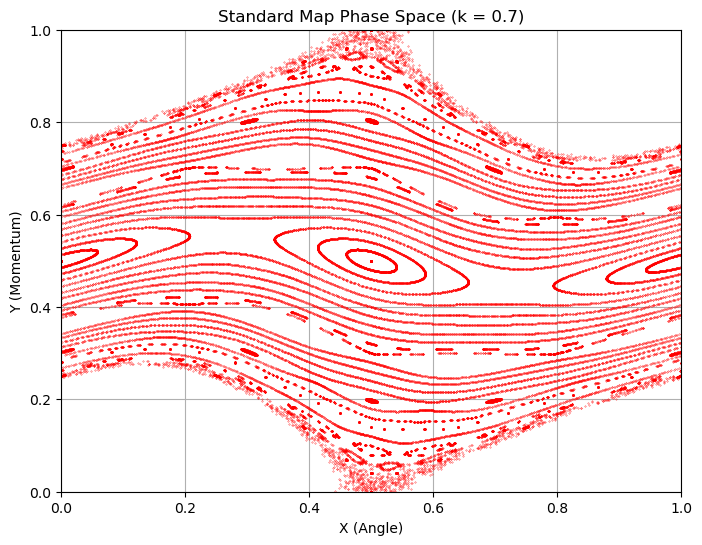

Simulating for k = 0.9 ...


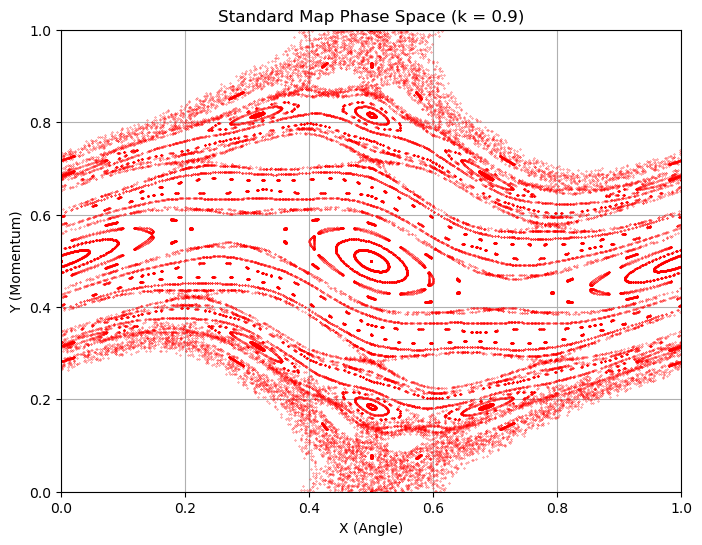

Simulating for k = 1.1 ...


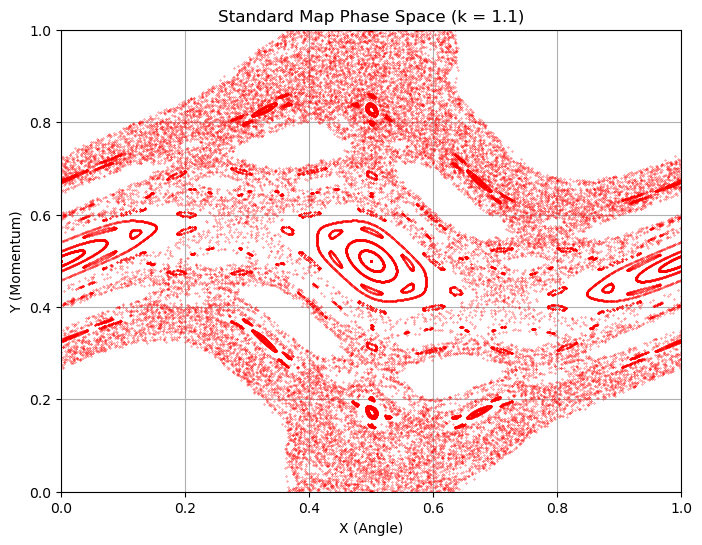

Simulating for k = 1.5 ...


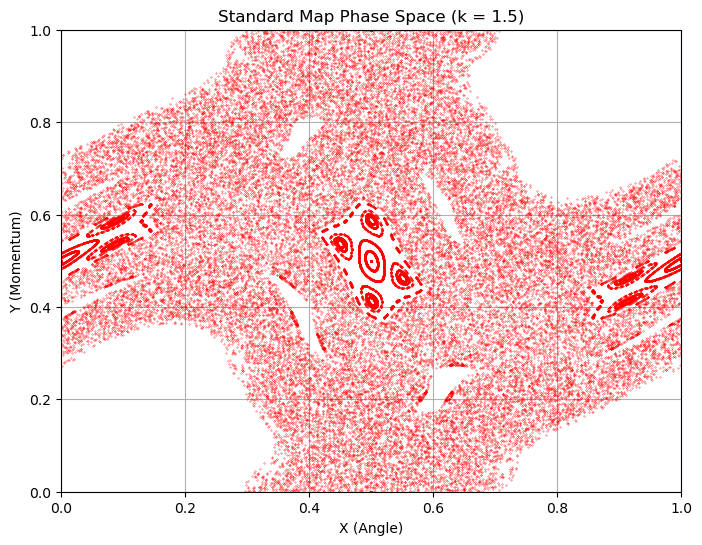

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class StandardMapSimulator:
    """
    A class to simulate and explore the Standard (Chirikov) Map dynamics.
    
    The Standard Map is defined as:
    
        y_{n+1} = (y_n - (k/(2π)) * sin(2π * x_n)) mod 1
        x_{n+1} = (x_n + y_{n+1}) mod 1
        
    where k is the parameter controlling the nonlinearity. The dynamics
    evolve on a torus (both x and y are taken modulo 1), and by varying k,
    one can observe the transition from regular to chaotic behavior.
    """
    
    def __init__(self, n_iter=1000, n_y=50, initial_x=0.5, k_values=None, mod=1.0, sort_k=True):
        """
        Initialize the simulation parameters.
        
        Parameters:
            n_iter (int): Number of iterations for each trajectory.
            n_y (int): Number of different initial y values.
            initial_x (float): Fixed initial x value.
            k_values (list or array): List of k parameter values to explore.
            mod (float): Modulo value (default is 1.0 for a torus).
            sort_k (bool): Whether to sort the k values in increasing order.
        """
        self.n_iter = n_iter
        self.n_y = n_y
        self.initial_x = initial_x
        self.mod = mod
        
        # Default k values if none provided (unsorted list)
        default_k = [0, 0.2, 0.7, 1.1, 1.5, 0.9]
        self.k_values = k_values if k_values is not None else default_k
        if sort_k:
            self.k_values = sorted(self.k_values)
    
    def simulate_trajectory(self, x, y, k):
        """
        Simulate a single trajectory for the given initial condition and parameter k.
        
        Parameters:
            x (float): Initial x value.
            y (float): Initial y value.
            k (float): Parameter k.
            
        Returns:
            xs, ys (list, list): Trajectory lists for x and y.
        """
        xs = [x]
        ys = [y]
        for _ in range(self.n_iter - 1):
            # Update y using the nonlinear kick term, then update x.
            y = (y - k/(2*np.pi) * np.sin(2*np.pi * x)) % self.mod
            x = (x + y) % self.mod
            xs.append(x)
            ys.append(y)
        return xs, ys
    
    def simulate(self, k):
        """
        Simulate multiple trajectories for a given k, varying the initial y.
        
        Parameters:
            k (float): Parameter k.
            
        Returns:
            trajectories (list of tuples): Each tuple contains (xs, ys) for one trajectory.
        """
        trajectories = []
        for i in range(self.n_y):
            y0 = i / self.n_y  # Spread initial y values uniformly between 0 and 1.
            xs, ys = self.simulate_trajectory(self.initial_x, y0, k)
            trajectories.append((xs, ys))
        return trajectories
    
    def plot_phase_space(self, k, trajectories, markersize=0.5, savefig=False):
        """
        Plot the phase-space portrait for a given parameter k.
        
        Parameters:
            k (float): Parameter k.
            trajectories (list): List of (xs, ys) trajectories.
            markersize (float): Marker size for plotting points.
            savefig (bool): Whether to save the plot as a PNG file.
        """
        plt.figure(figsize=(8, 6))
        for xs, ys in trajectories:
            plt.plot(xs, ys, 'r.', markersize=markersize)
        plt.title(f'Standard Map Phase Space (k = {k})')
        plt.xlabel('X (Angle)')
        plt.ylabel('Y (Momentum)')
        plt.xlim(0, self.mod)
        plt.ylim(0, self.mod)
        plt.grid(True)
        if savefig:
            filename = f'standard_map_k_{k}.png'
            plt.savefig(filename, dpi=300)
            print(f"Figure saved as {filename}")
        plt.show()
    
    def run_exploration(self, markersize=0.5, savefig=False):
        """
        Run the simulation and plotting for all specified k values.
        
        Parameters:
            markersize (float): Marker size for the plot.
            savefig (bool): Whether to save the figures.
        """
        for k in self.k_values:
            print(f"Simulating for k = {k} ...")
            trajectories = self.simulate(k)
            self.plot_phase_space(k, trajectories, markersize=markersize, savefig=savefig)

# Example usage:
if __name__ == '__main__':
    # You can adjust parameters as needed.
    # The k_values will be sorted in increasing order by default.
    simulator = StandardMapSimulator(
        n_iter=1000,
        n_y=50,
        initial_x=0.5,
        k_values=[0, 0.2, 0.5, 0.7, 1.1, 1.5, 0.9],  # unsorted list provided here
        sort_k=True  # This will sort the list so that the plots appear in increasing order of k.
    )
    simulator.run_exploration(markersize=0.5, savefig=False)